In [11]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 6.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/13.3 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.3 MB 4.5 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/13.3 MB 4.4 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/13.3 MB 4.3 MB/s eta 0:00:03
   --------------- ------------------------ 5.2/13.3 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/13.3 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 6.8/13.3 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 4.1 MB/s eta 0:00:02
   --------------------------- ------------ 9.2/13.3 MB 4.1 MB/s eta 0:00:02
   ------------------------------ --------- 10.2/13.3 MB 4.1 MB/s eta 0:00:01
   --

In [4]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\sadaa\Downloads\walmart Data.xlsx")


14:59:37 - cmdstanpy - INFO - Chain [1] start processing
14:59:38 - cmdstanpy - INFO - Chain [1] done processing


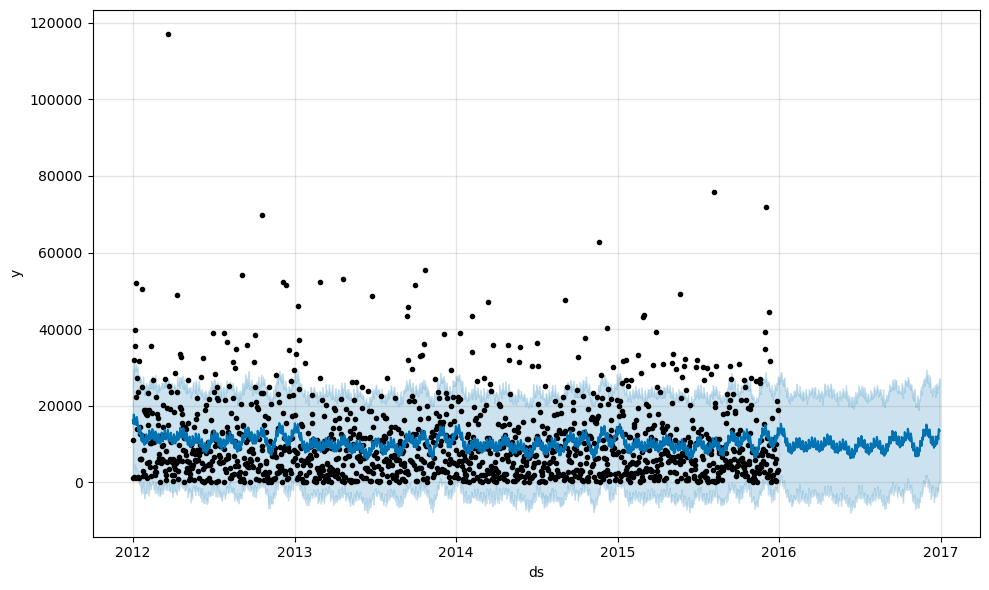

In [14]:
from prophet import Prophet
import pandas as pd

# Load your data (replace 'your_file.xlsx' with your actual file path)
data = pd.read_excel(r"C:\Users\sadaa\Downloads\walmart Data.xlsx")

# Preprocess the data for Prophet
time_series_data = data[['Order Date', 'Sales']].copy()
time_series_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# Ensure the 'ds' column is in datetime format and sort the data by date
time_series_data['ds'] = pd.to_datetime(time_series_data['ds'])
time_series_data = time_series_data.sort_values('ds')

# Aggregate sales by date (if multiple entries exist for the same date)
time_series_data = time_series_data.groupby('ds').sum().reset_index()

# Initialize and fit the Prophet model
model = Prophet()
model.fit(time_series_data)

# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=365)  # Predict for the next 365 days

# Forecast sales
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [16]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1778,2016-12-25
1779,2016-12-26
1780,2016-12-27
1781,2016-12-28
1782,2016-12-29


In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1778,2016-12-25,12040.698091,-1339.365827,25206.346759
1779,2016-12-26,11244.515354,-1279.230413,24558.101438
1780,2016-12-27,13878.581033,924.562158,27439.906236
1781,2016-12-28,13688.868200,920.783583,26961.604536
1782,2016-12-29,13401.311134,639.001378,28029.728384


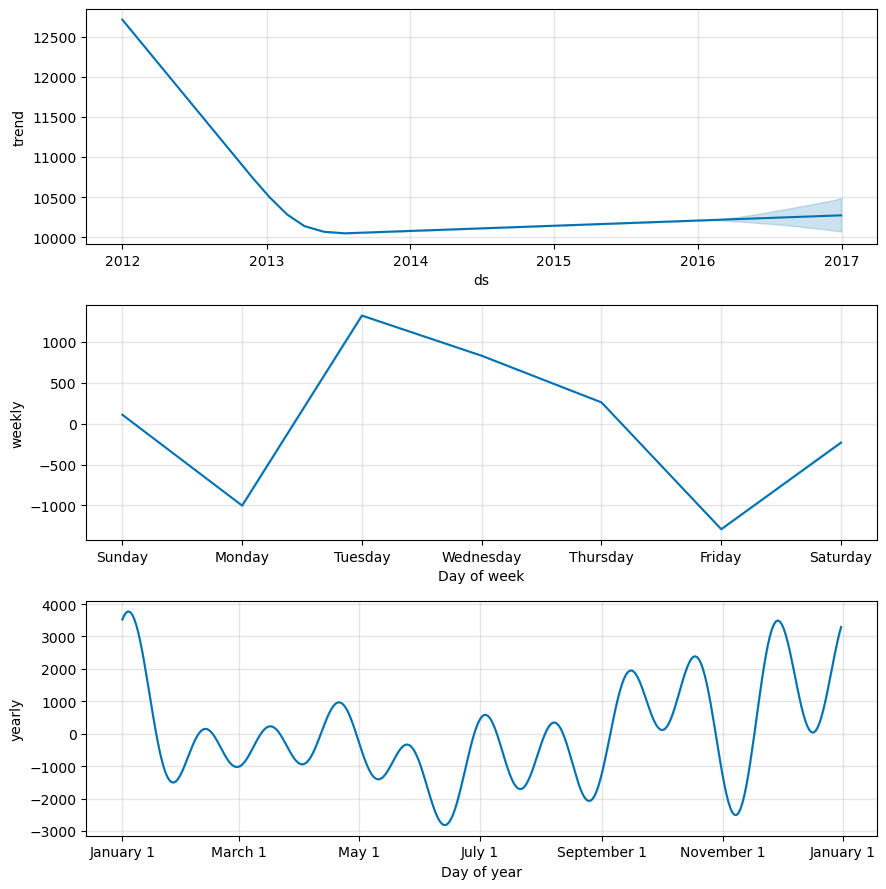

In [22]:
fig2 = model.plot_components(forecast)



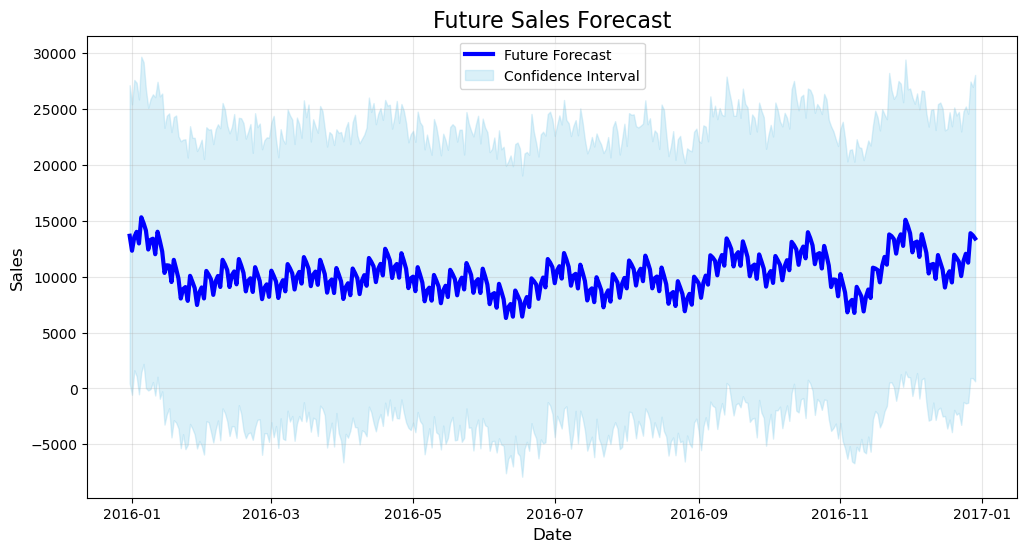

In [30]:
# Filter only future forecasted data
future_forecast = forecast[forecast['ds'] > time_series_data['ds'].max()]

# Check if future_forecast is empty
if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:
    # Plot the future forecast
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the forecasted future line
    ax.plot(
        future_forecast['ds'], 
        future_forecast['yhat'], 
        label='Future Forecast', 
        color='blue', 
        linewidth=3, 
        linestyle='-'
    )

    # Highlight confidence intervals for the future forecast
    ax.fill_between(
        future_forecast['ds'], 
        future_forecast['yhat_lower'], 
        future_forecast['yhat_upper'], 
        color='skyblue', 
        alpha=0.3, 
        label='Confidence Interval'
    )

    # Add labels, legend, and grid
    ax.set_title('Future Sales Forecast', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    # Display the plot
    plt.show()

Enter the number of months to forecast:  6


C:\Users\sadaa\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


             ds          yhat   yhat_lower    yhat_upper
1418 2015-12-31  13650.415424   553.759894  26316.094107
1419 2016-01-31   9031.448030 -4602.696806  21726.845475
1420 2016-02-29   8190.483006 -5736.344073  21730.877058
1421 2016-03-31   9579.565470 -4192.778282  23128.490555
1422 2016-04-30   9841.842400 -3756.946447  22305.734097
1423 2016-05-31  10705.774693 -3047.260530  23279.872237


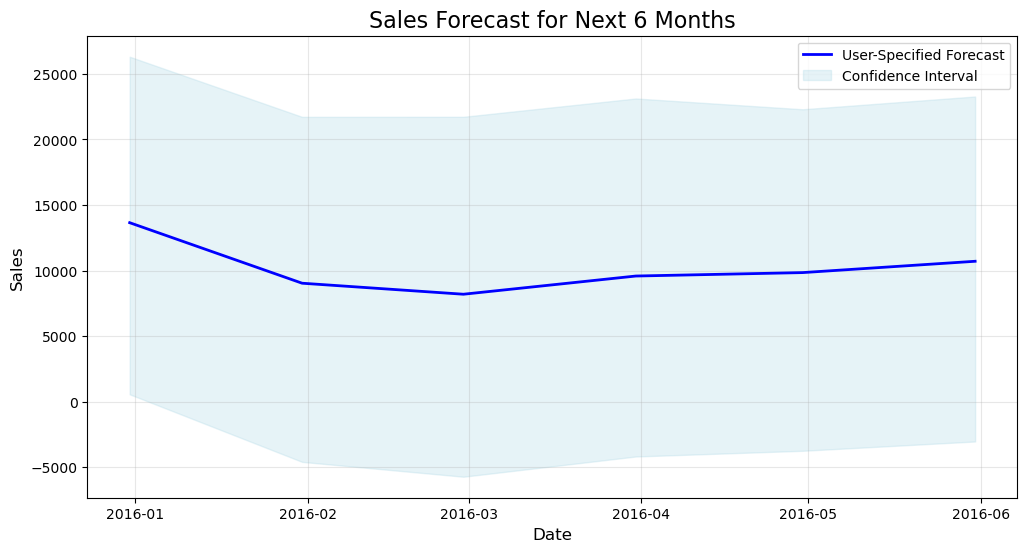

In [42]:
# User input for forecasting
input_months = int(input("Enter the number of months to forecast: "))

# Generate a future DataFrame based on user input
future = model.make_future_dataframe(periods=input_months, freq='M')

# Predict future sales
forecast = model.predict(future)

# Filter forecast data for user-defined range
last_date = time_series_data['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

# Check if future_forecast is empty
if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:
    # Display future forecast
    print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Plot the future forecast
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the forecasted line
    ax.plot(
        future_forecast['ds'], 
        future_forecast['yhat'], 
        label='User-Specified Forecast', 
        color='blue', 
        linewidth=2
    )

    # Highlight confidence intervals
    ax.fill_between(
        future_forecast['ds'], 
        future_forecast['yhat_lower'], 
        future_forecast['yhat_upper'], 
        color='lightblue', 
        alpha=0.3, 
        label='Confidence Interval'
    )

    # Add labels, legend, and grid
    ax.set_title(f"Sales Forecast for Next {input_months} Months", fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    plt.show()

In [14]:
from joblib import dump

# Save the trained Prophet model
dump(model, 'Prophet_model.joblib')

print("Model saved as 'Prophet_model.joblib'")


Model saved as 'Prophet_model.joblib'


In [18]:
output_path = r"C:\MyProjects\Prophet_model.csv"
data.to_csv(output_path, index=False)
print(f"Data successfully saved to {output_path}")

Data successfully saved to C:\MyProjects\Prophet_model.csv


In [26]:
output_path = r"C:\MyProjects\Prophet_model.joblib"
print(f"Data successfully saved to {output_path}")

Data successfully saved to C:\MyProjects\Prophet_model.joblib
